## Imports

In [3]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
import dateutil.parser as dparser
import collections

nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Fivos\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fivos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fivos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Preprocessing

In [ ]:
tweets = pd.read_csv(r"C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\twitter\Results tweets\results.csv")

In [3]:
tweets = tweets.loc[:, ~tweets.columns.str.contains('^Unnamed')]
tweets = tweets.dropna(how='any',axis=0) 

In [96]:
len(tweets)

7089271

After manual inspection we saw that some cryptocurrency jargon like 'FOMO' ,ATH and HODL where not included in the 
nltk word corpus so we decided not to exclude every word that is not in the corpus, since we would be losing a lot of words that hold special sentiment value in this case

In [6]:
words = set(nltk.corpus.words.words())
if 'FOMO' in words:
    print('Yes')

In [ ]:
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
for i in long_string.split():
    if i not in english_vocab:
        print(i)

In [7]:
len(words)

235892

We compiled a list of cryptocurrency specific terminology - slang and checked to see if these terms exist in the tweets we scraped

In [18]:
if 'moon' in long_string:
    print('Yes')

Yes


This list of contractions serves as a helper function so that vader can assign sentiment more easily

In [2]:
contractionsList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [3]:
#code source https://stackoverflow.com/a/19790352/15558553

c_re = re.compile('(%s)' % '|'.join(contractionsList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractionsList[match.group(0)]
    return c_re.sub(replace, text)


The function below reduces the consecutive characters to 3 when they are more than three (for example "Let's goooooooo" becomes "Let's gooo")

In [1]:
def reduce_chars(matchobj):
    return 3*matchobj.group(0)[1]

We run the preprocessing code for 10 days straight, reach about 60% and then pause it to save it and start again till the end

In [10]:
for i,s in enumerate(tqdm(tweets['Text'])):
    
    try:
        text = tweets.loc[i, 'Text']
        
        text = re.sub("^RT"," ",text) # Remove the RT at the start of the tweet when it exists
        
        text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+/[^\s]+', '', text, flags=re.MULTILINE) # Remove http links
        text = re.sub('www\.[a-z]?\.?(com)+|[a-z]+\.(com)','',text) # Remove www links 
        text = re.sub("\s+"," ",text) # Remove excess whitespace
        text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE) # Remove @mentions
        text = re.sub('&[a-z]+;','',text) # Remove html charachters
        
        text = re.sub(r'([a-zA-Z])\1{3,}', reduce_chars, text) # Reduce characters that contain more than 3 consecutive letters into just 3 consecutive letters
        
        if len(text.split()) < 4: # Remove tweets with less than 4 tokens
            tweets = tweets.drop(i)

        for w in re.findall(r'\B#\w*[a-zA-Z]+\w*', text): # If the hashtagged word exists in the nltk words corpus then remove the hashtag but keep the word, if it doesn't then remove the hashtagged word completely
            check = w.replace("#", "")
            if check.lower not in nltk.corpus.words.words():
                text = text.replace(w,'')
        text = text.replace('#','')


        text = expandContractions(text) # Expand contractions


        text = re.sub("\$(\w+)","",text) # Remove ticker symbols
        

        text = re.sub("[0-9]+\w+","",text) # Remove tokens containing numerical characters

                
        tweets.loc[i, 'Text'] = text

    except KeyError:
        continue       

#tweets.to_csv('/content/drive/MyDrive/tweets_preprocessed.csv', header=True,index=False)

 59%|█████████████████████████████████████▉                          | 4201446/7089271 [240:16:09<165:08:48,  4.86it/s]


KeyboardInterrupt: 

In [24]:
dataset.to_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_preprocessed_all.csv', header=True,index=False)

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
test_tweets = tweets.head(20)
test_tweets

,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt
0,1384521088089079808,$CELOLatest add into my portfolio is #celo.We ...,Siho,146,0,0,Tue Apr 20 14:55:25 +0000 2021
1,1384521088038752257,*3IQ DIGITAL ASSET MGMT TO LIST BITCOIN FUND O...,sellvolbuytesla,603,0,0,Tue Apr 20 14:55:25 +0000 2021
2,1384521087912927234,Bitcoin keeps getting rejected from many trend...,Crypto Bible,36798,0,0,Tue Apr 20 14:55:25 +0000 2021
3,1384521087057203201,RT @michael_saylor: #Bitcoin on Venmo for 70 m...,cjglory,525,1141,0,Tue Apr 20 14:55:24 +0000 2021
4,1384521086369476609,"Tue Apr 20 16:54:13 2021 (30:40)USD : 55,462.7...",Block Watcher,909,0,0,Tue Apr 20 14:55:24 +0000 2021
5,1384521086348320771,"RT @flurbnb: $200 reroll, winner didnt post pr...",Kysky,390,5256,0,Tue Apr 20 14:55:24 +0000 2021
6,1384521085866024967,RT @DocumentingBTC: Venmo’s 77 million users c...,texas_joker,22,682,0,Tue Apr 20 14:55:24 +0000 2021
7,1384521085450809346,@ray4tesla @elonmusk @ELONMUSK DIDNT TWEET 420...,"What Now, Really 🙄",19,0,0,Tue Apr 20 14:55:24 +0000 2021
8,1384521084792344577,RT @AgilePeter: My first crypto trading setup ...,peter Saddington,0,7,0,Tue Apr 20 14:55:24 +0000 2021
9,1384521084771332098,RT @bitstein: How to talk to #Bitcoin skeptics...,known 💰,296,496,0,Tue Apr 20 14:55:24 +0000 2021


There is no need to casefold the tweet texts or to remove punctuation, no need to remove stopwords, Vader does all that already. We compile the list of cryptoslang to use in the sentiment analysis section. We do not apply Lematisation (Wordnet Lemmatizer) : VADER, has different ratings depending on the form of the word and 
therefore the input should not be stemmed or lemmatized (source : https://opendatagroup.github.io/data%20science/2019/03/21/preprocessing-text.html )


In [ ]:
''' The incredible thing about VADER is it doesn’t require a great deal of preprocessing to work. 
Unlike with some supervised methods of NLP, preprocessing necessities such as tokenisation and stemming/lemmatisation
are not required. You can pretty much plug in any body of text and it will determine the sentiment.
VADER is even smart enough to understand the valence of non-conventional text, including emojis (i.e. :-( ),
capitalisation (i.e. sad vs SAD) and extended punctuation (i.e. ? vs ???). This is what makes the module so good
at analysing social media text. Additionally, VADER removes stop words automatically so there is no need to do so yourself.
'''

We print some test tweets before and after preprocessing (printing the result in each step of the process) 

In [18]:
#test_text = test_tweets.loc[1]['Text']
for i,s in enumerate(tqdm(test_tweets['Text'])):
    
    
    test_text = test_tweets.loc[i, 'Text']
    print('Dirty text: ',test_text)
    
    test_text = re.sub("^RT"," ",test_text) #remove the RT at the start of the tweet when it exists
    print('\nText after removing RT: ',test_text)
    
    test_text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+/[^\s]+', '', test_text, flags=re.MULTILINE) #remove http links
    test_text = re.sub('www\.[a-z]?\.?(com)+|[a-z]+\.(com)','',test_text) #remove www links 
    test_text = re.sub("\s+"," ",test_text) #remove excess whitespace
    test_text = re.sub('@\\w+ *', '', test_text, flags=re.MULTILINE) #remove @mentions
    test_text = re.sub('&[a-z]+;','',test_text) #remove html charachters
    print('\nText after removing URLs, mentions, html characters and whitespace: ',test_text)
    
    test_text = re.sub(r'([a-zA-Z])\1{3,}', reduce_chars, test_text) #reduce characters that contain more than 3 consecutive letters into just 3 consecutive letters
    print('\nText after reducing character sequences >3 to 3: ',test_text)
    
    if len(test_text.split()) < 4: #remove tweets with less than 4 tokens
        test_tweets = test_tweets.drop(i)

    for w in re.findall(r'\B#\w*[a-zA-Z]+\w*', test_text): #if the hashtagged word exists in the nltk words corpus then remove the hashtag but keep the word, if it doesn't then remove the hashtagged word completely
        check = w.replace("#", "")
        if check.lower not in nltk.corpus.words.words():
            test_text = test_text.replace(w,'')
    test_text = test_text.replace('#','')
    print('\nText after removing hashtags that are not in the Reuters corpus: ',test_text)

    test_text = expandContractions(test_text) #expand contractions
    print('\nText after expanding contraptions: ',test_text)

    test_text = re.sub("\$(\w+)","",test_text) #remove ticker symbols
    print('\nText after removing ticker symbols: ',test_text)
    

    test_text = re.sub("[0-9]+\w+","",test_text) #remove tokens containing numerical characters
    print('\nText after removing numerical characters: ',test_text)

    

    
    
    print('\nClean text: ',test_text)
    print('\n')
    
    test_tweets.loc[i, 'Text'] = test_text
    


    

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Dirty text:  $CELOLatest add into my portfolio is #celo.We saw very good news coming out today.Watching this closely and adding on a breakout.#crypto #bitcoin #cryptocurrency #btc #ethereum #luna #terra #altcoin #cryptocurrencies #altcoins #trade #defi #NTF #chart #eth#cryptotwitter https://t.co/ilNouj637K

Text after removing RT:  $CELOLatest add into my portfolio is #celo.We saw very good news coming out today.Watching this closely and adding on a breakout.#crypto #bitcoin #cryptocurrency #btc #ethereum #luna #terra #altcoin #cryptocurrencies #altcoins #trade #defi #NTF #chart #eth#cryptotwitter https://t.co/ilNouj637K

Text after removing URLs, mentions, html characters and whitespace:  $CELOLatest add into my portfolio is #celo.We saw very good news coming out today.Watching this closely and adding on a breakout.#crypto #bitcoin #cryptocurrency #btc #ethereum #luna #terra #altcoin #cryptocurrencies #altcoins #trade #defi #NTF #chart #eth#cryptotwitter 

Text after reducing characte

C:\Users\Fivos\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-18-b72521aa4a88>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_tweets.loc[i, 'Text'] = test_text
 15%|████████████▍                                                                      | 3/20 [00:01<00:21,  1.29s/it]


Text after removing hashtags that are not in the Reuters corpus:  $CELOLatest add into my portfolio is .We saw very good news coming out today.Watching this closely and adding on a breakout.  currency      currencies s     twitter 

Text after expanding contraptions:  $CELOLatest add into my portfolio is .We saw very good news coming out today.Watching this closely and adding on a breakout.  currency      currencies s     twitter 

Text after removing ticker symbols:   add into my portfolio is .We saw very good news coming out today.Watching this closely and adding on a breakout.  currency      currencies s     twitter 

Text after removing numerical characters:   add into my portfolio is .We saw very good news coming out today.Watching this closely and adding on a breakout.  currency      currencies s     twitter 

Clean text:   add into my portfolio is .We saw very good news coming out today.Watching this closely and adding on a breakout.  currency      currencies s     twitter 


D

 25%|████████████████████▊                                                              | 5/20 [00:02<00:10,  1.45it/s]


Text after removing hashtags that are not in the Reuters corpus:   :  on Venmo for 70 million users places more pressure on Apple, Google,  Facebook to integrate bitcoin into thei…

Text after expanding contraptions:   :  on Venmo for 70 million users places more pressure on Apple, Google,  Facebook to integrate bitcoin into thei…

Text after removing ticker symbols:   :  on Venmo for 70 million users places more pressure on Apple, Google,  Facebook to integrate bitcoin into thei…

Text after removing numerical characters:   :  on Venmo for  million users places more pressure on Apple, Google,  Facebook to integrate bitcoin into thei…

Clean text:   :  on Venmo for  million users places more pressure on Apple, Google,  Facebook to integrate bitcoin into thei…


Dirty text:  Tue Apr 20 16:54:13 2021 (30:40)USD : 55,462.75Wght: 211,599Blk#: 679,913Size: 1,340.5Txs : 3,060Pool: 126,436 (72.4 MB)#bitcoin

Text after removing RT:  Tue Apr 20 16:54:13 2021 (30:40)USD : 55,462.75Wght: 211,59

 35%|█████████████████████████████                                                      | 7/20 [00:02<00:06,  2.16it/s]


Text after removing hashtags that are not in the Reuters corpus:   : $200 reroll, winner didnt post proof of 🔔. retweet + follow + post proof of 🔔. ends in 24 hours.    …

Text after expanding contraptions:   : $200 reroll, winner didnt post proof of 🔔. retweet + follow + post proof of 🔔. ends in 24 hours.    …

Text after removing ticker symbols:   :  reroll, winner didnt post proof of 🔔. retweet + follow + post proof of 🔔. ends in 24 hours.    …

Text after removing numerical characters:   :  reroll, winner didnt post proof of 🔔. retweet + follow + post proof of 🔔. ends in  hours.    …

Clean text:   :  reroll, winner didnt post proof of 🔔. retweet + follow + post proof of 🔔. ends in  hours.    …


Dirty text:  RT @DocumentingBTC: Venmo’s 77 million users can now buy, hold, and sell #bitcoin with as little as $1.

Text after removing RT:    @DocumentingBTC: Venmo’s 77 million users can now buy, hold, and sell #bitcoin with as little as $1.

Text after removing URLs, mentions, html c

 45%|█████████████████████████████████████▎                                             | 9/20 [00:03<00:04,  2.72it/s]


Text after removing hashtags that are not in the Reuters corpus:  DIDNT TWEET 420 FUNDED SECUREDPEDO GUYSTOCKS R 2HIGHOR 99% OF HIS  WANTS🚫    ❗BLACKMAILED SINCE 2018🚫👶X❗POISONED HIMHELPED A GROUP RAPETORTURE HIM🎥🎥 

Text after expanding contraptions:  DIDNT TWEET 420 FUNDED SECUREDPEDO GUYSTOCKS R 2HIGHOR 99% OF HIS  WANTS🚫    ❗BLACKMAILED SINCE 2018🚫👶X❗POISONED HIMHELPED A GROUP RAPETORTURE HIM🎥🎥 

Text after removing ticker symbols:  DIDNT TWEET 420 FUNDED SECUREDPEDO GUYSTOCKS R 2HIGHOR 99% OF HIS  WANTS🚫    ❗BLACKMAILED SINCE 2018🚫👶X❗POISONED HIMHELPED A GROUP RAPETORTURE HIM🎥🎥 

Text after removing numerical characters:  DIDNT TWEET  FUNDED SECUREDPEDO GUYSTOCKS R  % OF HIS  WANTS🚫    ❗BLACKMAILED SINCE 🚫👶X❗POISONED HIMHELPED A GROUP RAPETORTURE HIM🎥🎥 

Clean text:  DIDNT TWEET  FUNDED SECUREDPEDO GUYSTOCKS R  % OF HIS  WANTS🚫    ❗BLACKMAILED SINCE 🚫👶X❗POISONED HIMHELPED A GROUP RAPETORTURE HIM🎥🎥 


Dirty text:  RT @AgilePeter: My first crypto trading setup back in 2017. See tha

 50%|█████████████████████████████████████████                                         | 10/20 [00:03<00:02,  3.45it/s]


Text after removing hashtags that are not in the Reuters corpus:   : How to talk to  skeptics: 

Text after expanding contraptions:   : How to talk to  skeptics: 

Text after removing ticker symbols:   : How to talk to  skeptics: 

Text after removing numerical characters:   : How to talk to  skeptics: 

Clean text:   : How to talk to  skeptics: 


Dirty text:  🤝 Follow me on @betfury. Let's hunt for Bitcoins together! Get an exciting experience on #1 I-Gaming platform with #BTC staking payouts!💰.My Username: Irdel #betfurysuccess #bitcoin #staking

Text after removing RT:  🤝 Follow me on @betfury. Let's hunt for Bitcoins together! Get an exciting experience on #1 I-Gaming platform with #BTC staking payouts!💰.My Username: Irdel #betfurysuccess #bitcoin #staking

Text after removing URLs, mentions, html characters and whitespace:  🤝 Follow me on . Let's hunt for Bitcoins together! Get an exciting experience on #1 I-Gaming platform with #BTC staking payouts!💰.My Username: Irdel #betfury

 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:03<00:01,  4.07it/s]


Text after removing hashtags that are not in the Reuters corpus:  🤝 Follow me on . Let's hunt for Bitcoins together! Get an exciting experience on 1 I-Gaming platform with  staking payouts!💰.My Username: Irdel   

Text after expanding contraptions:  🤝 Follow me on . Let's hunt for Bitcoins together! Get an exciting experience on 1 I-Gaming platform with  staking payouts!💰.My Username: Irdel   

Text after removing ticker symbols:  🤝 Follow me on . Let's hunt for Bitcoins together! Get an exciting experience on 1 I-Gaming platform with  staking payouts!💰.My Username: Irdel   

Text after removing numerical characters:  🤝 Follow me on . Let's hunt for Bitcoins together! Get an exciting experience on 1 I-Gaming platform with  staking payouts!💰.My Username: Irdel   

Clean text:  🤝 Follow me on . Let's hunt for Bitcoins together! Get an exciting experience on 1 I-Gaming platform with  staking payouts!💰.My Username: Irdel   


Dirty text:  RT @Elmo_Outlaw: Too much permission is being buil

 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:04<00:00,  6.31it/s]


Text after removing hashtags that are not in the Reuters corpus:   : Middle East gets its first listed  fund on the Nasdaq-Dubai. Yalla Bitcoin!!

Text after expanding contraptions:   : Middle East gets its first listed  fund on the Nasdaq-Dubai. Yalla Bitcoin!!

Text after removing ticker symbols:   : Middle East gets its first listed  fund on the Nasdaq-Dubai. Yalla Bitcoin!!

Text after removing numerical characters:   : Middle East gets its first listed  fund on the Nasdaq-Dubai. Yalla Bitcoin!!

Clean text:   : Middle East gets its first listed  fund on the Nasdaq-Dubai. Yalla Bitcoin!!


Dirty text:  @hubsarasota U do think BTC will be consolidating for this whole week ?

Text after removing RT:  @hubsarasota U do think BTC will be consolidating for this whole week ?

Text after removing URLs, mentions, html characters and whitespace:  U do think BTC will be consolidating for this whole week ?

Text after reducing character sequences >3 to 3:  U do think BTC will be consolidatin

 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:04<00:00,  5.24it/s]


Text after removing hashtags that are not in the Reuters corpus:   : 🖤 $1000 to someone who retweets this and follows , ends in 1 week! 🖤    

Text after expanding contraptions:   : 🖤 $1000 to someone who retweets this and follows , ends in 1 week! 🖤    

Text after removing ticker symbols:   : 🖤  to someone who retweets this and follows , ends in 1 week! 🖤    

Text after removing numerical characters:   : 🖤  to someone who retweets this and follows , ends in 1 week! 🖤    

Clean text:   : 🖤  to someone who retweets this and follows , ends in 1 week! 🖤    


Dirty text:  RT @Sweepsgg: I’m giving $100 to one lucky follower that retweets this within the next 24 hours. #BitcoinTo enter:1. Follow @MoonRatFina…

Text after removing RT:    @Sweepsgg: I’m giving $100 to one lucky follower that retweets this within the next 24 hours. #BitcoinTo enter:1. Follow @MoonRatFina…

Text after removing URLs, mentions, html characters and whitespace:   : I’m giving $100 to one lucky follower that ret

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.14it/s]


Text after removing hashtags that are not in the Reuters corpus:   : If you run only one  node instead of 2 or more, you're not doing it right.

Text after expanding contraptions:   : If you run only one  node instead of 2 or more, you are not doing it right.

Text after removing ticker symbols:   : If you run only one  node instead of 2 or more, you are not doing it right.

Text after removing numerical characters:   : If you run only one  node instead of 2 or more, you are not doing it right.

Clean text:   : If you run only one  node instead of 2 or more, you are not doing it right.




## Datetime Processing

In [2]:
processed_tweets = pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_preprocessed_all.csv')
processed_tweets

C:\Users\Fivos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt
0,1.384521e+18,add into my portfolio is .We saw very good ne...,Siho,146.0,0.0,0.0,Tue Apr 20 14:55:25 +0000 2021
1,1.384521e+18,* DIGITAL ASSET MGMT TO LIST BITCOIN FUND ON N...,sellvolbuytesla,603.0,0.0,0.0,Tue Apr 20 14:55:25 +0000 2021
2,1.384521e+18,Bitcoin keeps getting rejected from many trend...,Crypto Bible,36798.0,0.0,0.0,Tue Apr 20 14:55:25 +0000 2021
3,1.384521e+18,: on Venmo for million users places more pr...,cjglory,525.0,1141.0,0.0,Tue Apr 20 14:55:24 +0000 2021
4,1.384521e+18,"Tue Apr :: (:)USD : ,.: ,: ,: 1,. : 3,: , (....",Block Watcher,909.0,0.0,0.0,Tue Apr 20 14:55:24 +0000 2021
...,...,...,...,...,...,...,...
7089266,NaN,: anyone?,NaN,NaN,NaN,NaN,NaN
7089267,NaN,is fungible,NaN,NaN,NaN,NaN,NaN
7089268,NaN,AprilFoolsDay joke,NaN,NaN,NaN,NaN,NaN
7089269,NaN,Gained more gravity,NaN,NaN,NaN,NaN,NaN


In [ ]:
processed_tweets.isnull().sum()

We delete the last 65000 rows because they had NaN values due to an error

In [ ]:
processed_tweets = processed_tweets[0:7089713 - 65000]

In [35]:
processed_tweets.to_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_preprocessed_final.csv', header=True,index=False)

In [ ]:
processed_tweets =  pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_preprocessed_final.csv')

We convert the string of date to Datetime

In [3]:
for i in tqdm(range(len(processed_tweets))):
    try:
        processed_tweets['CreatedAt'][i] = datetime.strptime(processed_tweets['CreatedAt'][i],'%a %b %d %H:%M:%S +0000 %Y')
    except KeyError:
        continue

  0%|                                                                                      | 0/7024713 [00:00<?, ?it/s]<ipython-input-3-c60885713111>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_tweets['CreatedAt'][i] = datetime.strptime(processed_tweets['CreatedAt'][i],'%a %b %d %H:%M:%S +0000 %Y')
100%|████████████████████████████████████████████████████████████████████| 7024713/7024713 [105:57:59<00:00, 18.41it/s]


In [4]:
processed_tweets.to_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_preprocessed_final_datetime.csv')

In [2]:
processed_tweets = pd.read_csv(r'C:\Users\Fivos\Desktop\Πτυχιακή\Data Collection\tweets_preprocessed_final_datetime.csv')

In [3]:
dates = ['None']*len(processed_tweets)
for i in tqdm(range(len(processed_tweets))):
    dates[i] = processed_tweets['CreatedAt'][i][0:10]

100%|████████████████████████████████████████████████████████████████████| 7024713/7024713 [00:46<00:00, 150294.43it/s]


In [4]:
counter=collections.Counter(dates)

In [15]:
keys_list = []
keys_list = [i for i in reversed(counter.keys())]

In [17]:
values_list = []
values_list = [i for i in reversed(counter.values())]

In [47]:
#for figure size
plt.rcParams['figure.figsize'] = [15, 10]

The daily Bitcoin related tweet amount is shown in the graph below

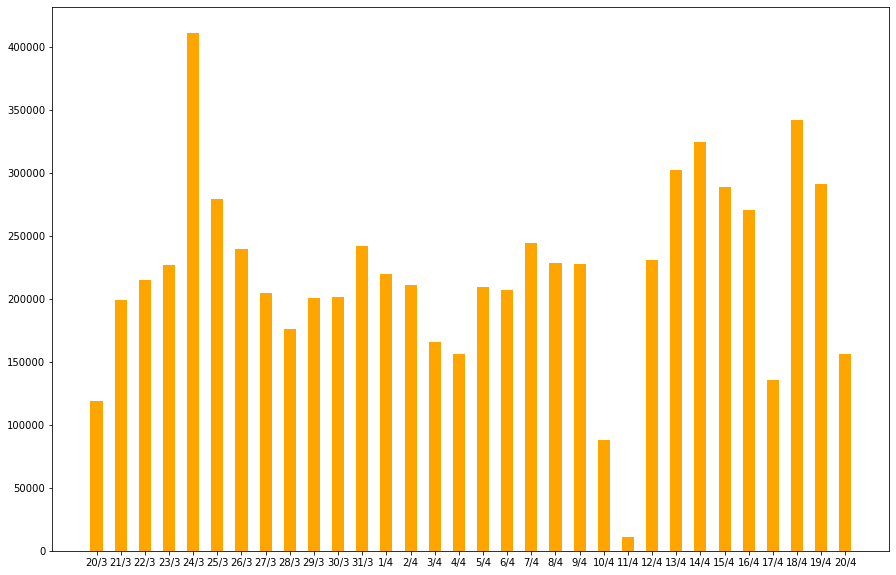

In [48]:
labels = ['20/3','21/3','22/3','23/3','24/3','25/3','26/3','27/3','28/3','29/3','30/3','31/3','1/4','2/4','3/4','4/4','5/4','6/4','7/4','8/4','9/4','10/4','11/4','12/4','13/4','14/4','15/4','16/4','17/4','18/4','19/4','20/4']
plt.bar(keys_list,values_list, width = 0.5, color = 'orange', tick_label = labels)
plt.show()

In [49]:
print('The mean daily volume of tweets is',np.mean(values_list))
print('\nThe Standard Deviation is',np.std(values_list))

The mean daily volume of tweets is 219522.28125

The Standard Deviation is 74937.71200563604
